In [72]:
import rasterio
from rasterio.plot import show
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
def freq_calc( array, band ):
    pixels = array.shape[1]*array.shape[2]
    freq_array = [0]*256
    for i in range(0,array.shape[2]):
        for j in range(0, array.shape[1]):
            freq_array[ array[band][j][i] ] += 1/pixels
    return freq_array

In [74]:
def upload_image():
    while True:
        try:
            # Prompt the user to enter the image path
            file_path = input("Please provide the path of the image: ")

            if file_path == "exit" :
                return None
            # Try opening the image directly from the file path
            tci = rasterio.open(file_path)
            #img.verify()  # Check if it's a valid image
            
            print("Image uploaded successfully!")
            #img = Image.open(file_path)  # Re-open to work with the image
            #img.show()  # Display the image
            return tci

        except (IOError, SyntaxError) as e:
            # If an error occurs, it means the file is not a valid image
            print("The file is not a valid image. Please try again.")

In [75]:
tci = upload_image()

Please provide the path of the image:  /Users/ritwikrazneesh/Documents/GNR_1/607_SIP/project/low_con_gangotri_all_bands_sub.tif


Image uploaded successfully!


1 = Costal </br>
2 = Blue </br>
3 = Green </br>
4 = Red </br>
5 = NIR </br>
6 = SWIR1 </br>
7 = SWIR2 </br>
 </br>
RGB

In [77]:
red = int( input("Which band to display as Red : ") )
green = int( input("Which band to display as Green : ") )
blue = int( input("Which band to display as Blue : ") )

Which band to display as Red :  6
Which band to display as Green :  5
Which band to display as Blue :  4


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


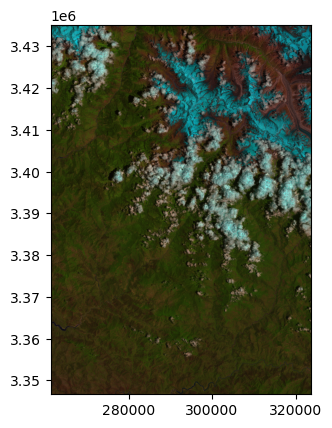

In [78]:
show((tci, [red, green, blue]), adjust='linear');

Please provide the path of the image:  /Users/ritwikrazneesh/Documents/GNR_1/607_SIP/project/high_contrast.png


Image uploaded successfully!


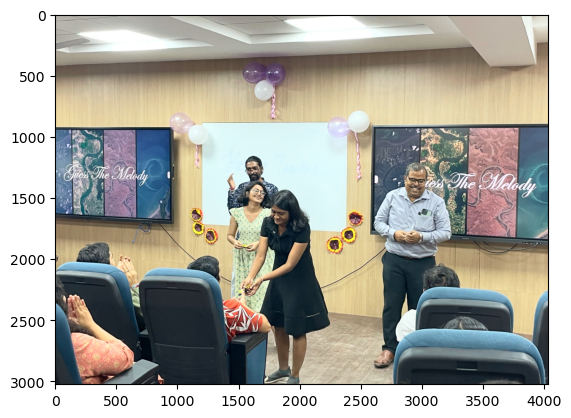

In [79]:
high_img = upload_image()
show(high_img);

In [80]:
t = tci.read([red, green, blue])
t = (t*(255/65535)).astype('uint8')
t2 = high_img.read([1,2,3])

In [81]:
Red_freq = freq_calc( t, 0 );
Red_high_freq = freq_calc( t2, 0 );

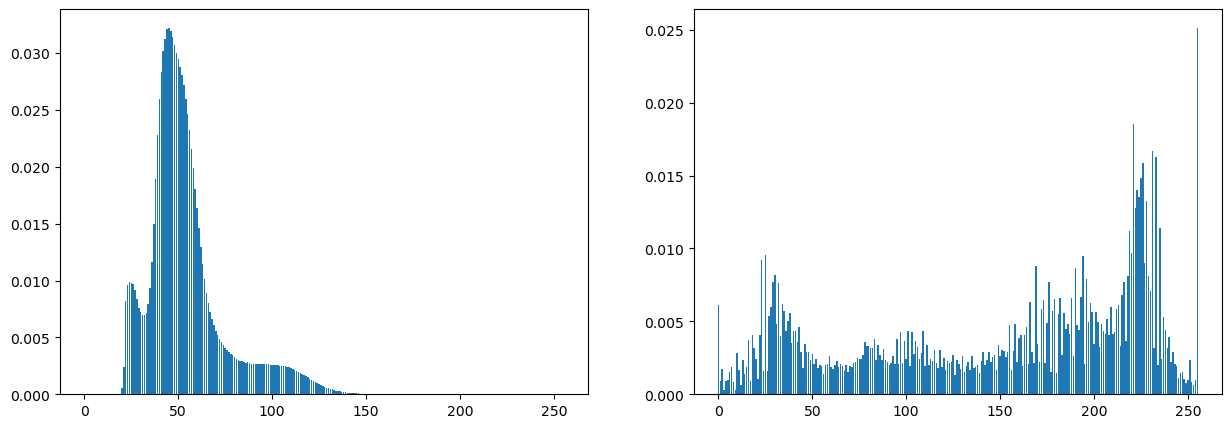

In [82]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Red_freq);
ax[1].bar(range(0,256), Red_high_freq);

In [83]:
Red_cum_freq = [ Red_freq[0] ]
for i in range( 1, 256 ) :
    Red_cum_freq.append( Red_cum_freq[i-1]+Red_freq[i] )

Red_high_cum_freq = [ Red_high_freq[0] ]
for i in range( 1, 256 ) :
    Red_high_cum_freq.append( Red_high_cum_freq[i-1]+Red_high_freq[i] )

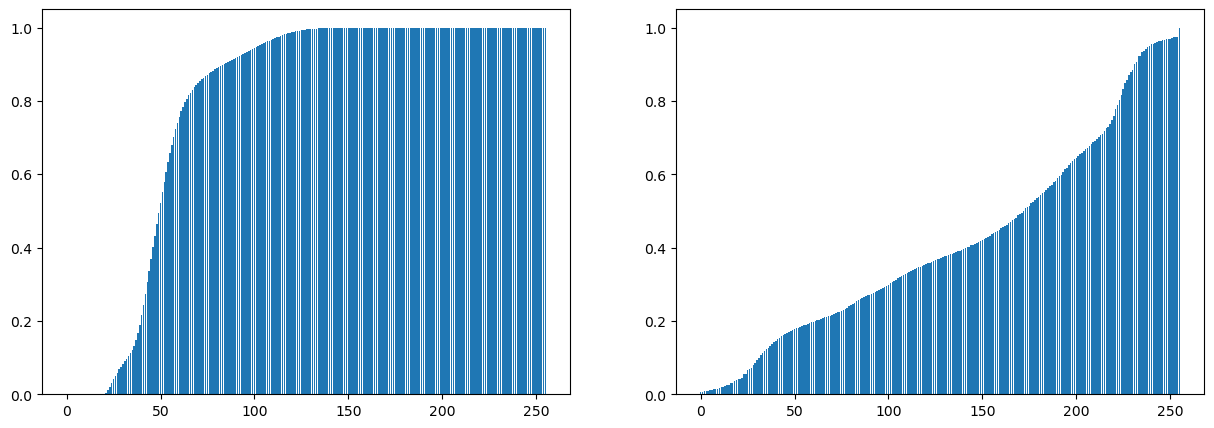

In [84]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Red_cum_freq);
ax[1].bar(range(0,256), Red_high_cum_freq);

In [85]:
i_low = 0
i_high = 0
Red_new_pixels = []

while i_low < 256 :
    if  i_high == 255 :
        Red_new_pixels.append(i_high)
        i_low += 1
    else :
        if ( ( Red_cum_freq[i_low] < Red_high_cum_freq[i_high+1] ) ) :
            Red_new_pixels.append(i_high)
            i_low += 1
        else :
            i_high += 1

In [86]:
for i in range(0,t.shape[2]):
    for j in range( 0, t.shape[1] ):
        t[0][j][i] = Red_new_pixels[ t[0][j][i] ]

In [87]:
Red_freq_new = freq_calc( t, 0 );

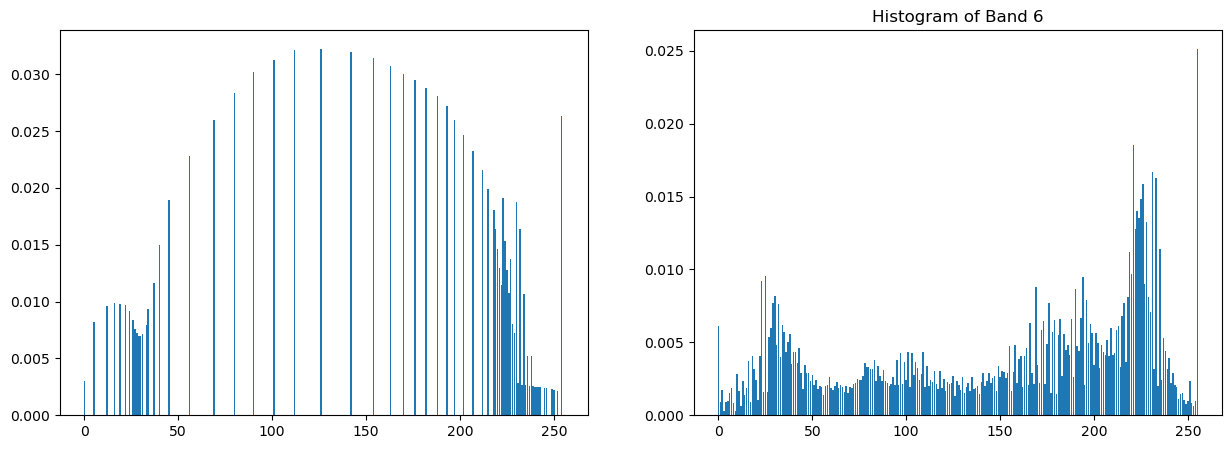

In [88]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )
plt.title(f"Histogram of Band {red}")
ax[0].bar(range(0,256), Red_freq_new);
ax[1].bar(range(0,256), Red_high_freq);

In [89]:
Green_freq = freq_calc( t, 1 );
Green_high_freq = freq_calc( t2, 1 );

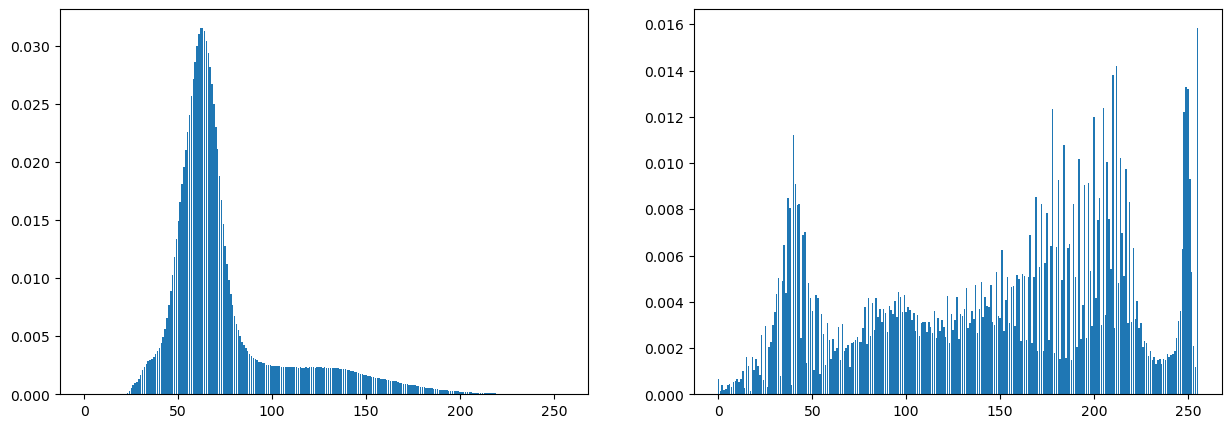

In [90]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Green_freq);
ax[1].bar(range(0,256), Green_high_freq);

In [91]:
Green_cum_freq = [ Green_freq[0] ]
for i in range( 1, 256 ) :
    Green_cum_freq.append( Green_cum_freq[i-1]+Green_freq[i] )

Green_high_cum_freq = [ Green_high_freq[0] ]
for i in range( 1, 256 ) :
    Green_high_cum_freq.append( Green_high_cum_freq[i-1]+Green_high_freq[i] )

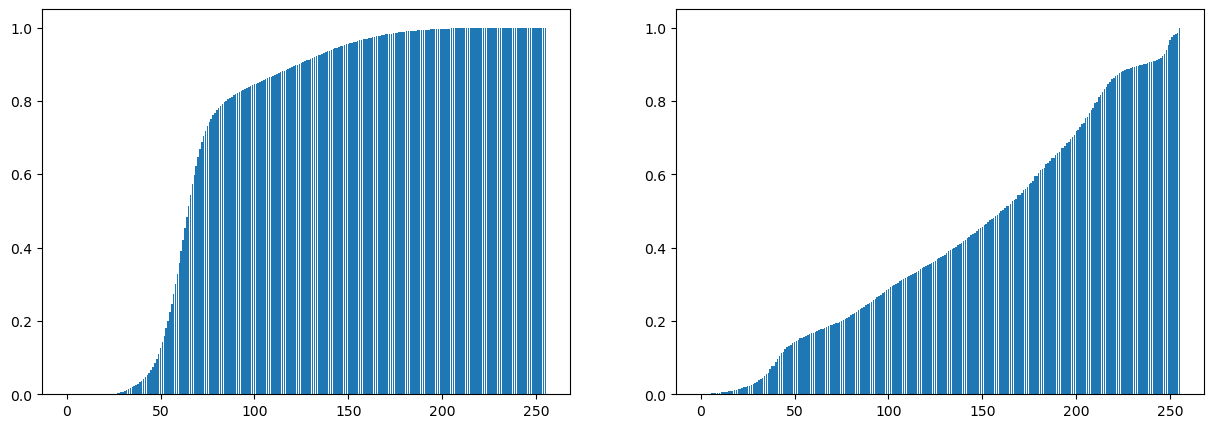

In [92]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Green_cum_freq);
ax[1].bar(range(0,256), Green_high_cum_freq);

In [93]:
i_low = 0
i_high = 0
Green_new_pixels = []

while i_low < 256 :
    if  i_high == 255 :
        Green_new_pixels.append(i_high)
        i_low += 1
    else :
        if ( ( Green_cum_freq[i_low] < Green_high_cum_freq[i_high+1] ) ) :
            Green_new_pixels.append(i_high)
            i_low += 1
        else :
            i_high += 1

In [94]:
for i in range(0,t.shape[2]):
    for j in range( 0, t.shape[1] ):
        t[1][j][i] = Green_new_pixels[ t[1][j][i] ]

In [95]:
Green_freq_new = freq_calc( t, 1 );

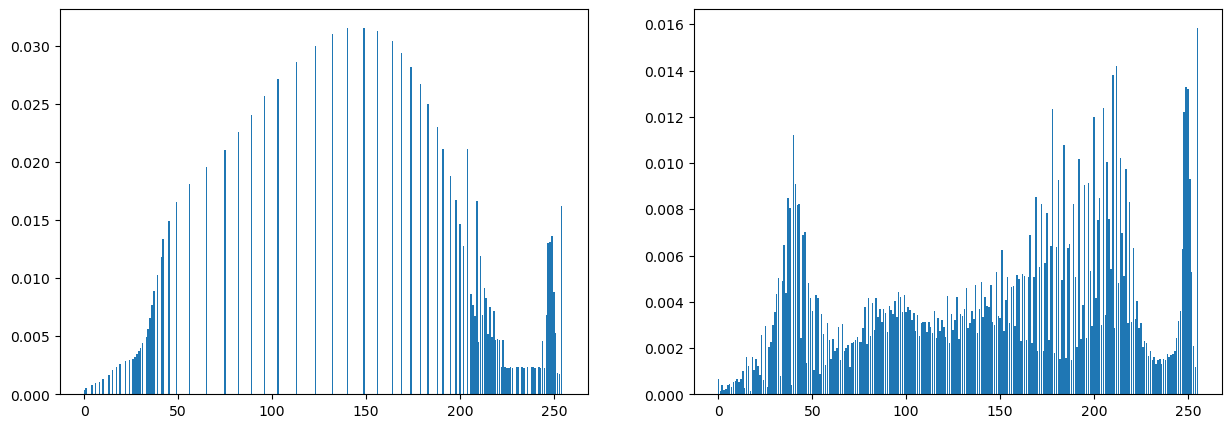

In [96]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Green_freq_new);
ax[1].bar(range(0,256), Green_high_freq);

In [97]:
Blue_freq = freq_calc( t, 2 );
Blue_high_freq = freq_calc( t2, 2 );

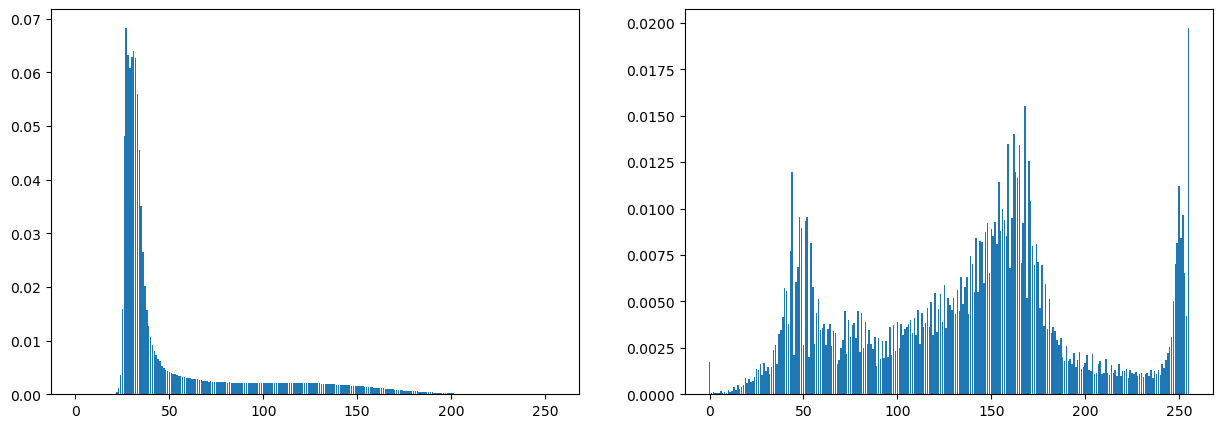

In [98]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Blue_freq);
ax[1].bar(range(0,256), Blue_high_freq);

In [99]:
Blue_cum_freq = [ Blue_freq[0] ]
for i in range( 1, 256 ) :
    Blue_cum_freq.append( Blue_cum_freq[i-1] + Blue_freq[i] )

Blue_high_cum_freq = [ Blue_high_freq[0] ]
for i in range( 1, 256 ) :
    Blue_high_cum_freq.append( Blue_high_cum_freq[i-1] + Blue_high_freq[i] )

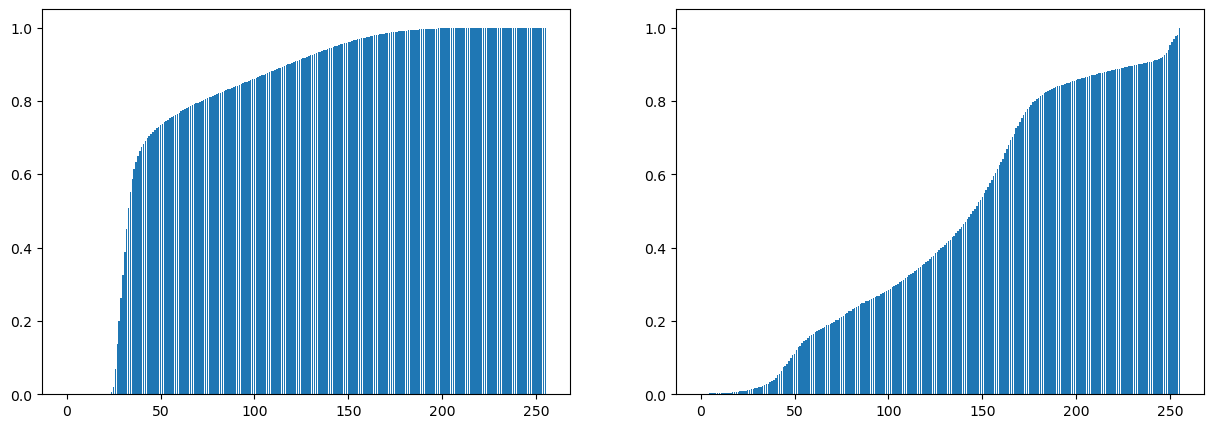

In [100]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Blue_cum_freq);
ax[1].bar(range(0,256), Blue_high_cum_freq);

In [101]:
i_low = 0
i_high = 0
Blue_new_pixels = []

while i_low < 256 :
    if  i_high == 255 :
        Blue_new_pixels.append(i_high)
        i_low += 1
    else :
        if ( ( Blue_cum_freq[i_low] < Blue_high_cum_freq[i_high+1] ) ) :
            Blue_new_pixels.append(i_high)
            i_low += 1
        else :
            i_high += 1

In [102]:
for i in range(0,t.shape[2]):
    for j in range( 0, t.shape[1] ):
        t[2][j][i] = Blue_new_pixels[ t[2][j][i] ]

In [103]:
Blue_freq_new = freq_calc( t, 2 );

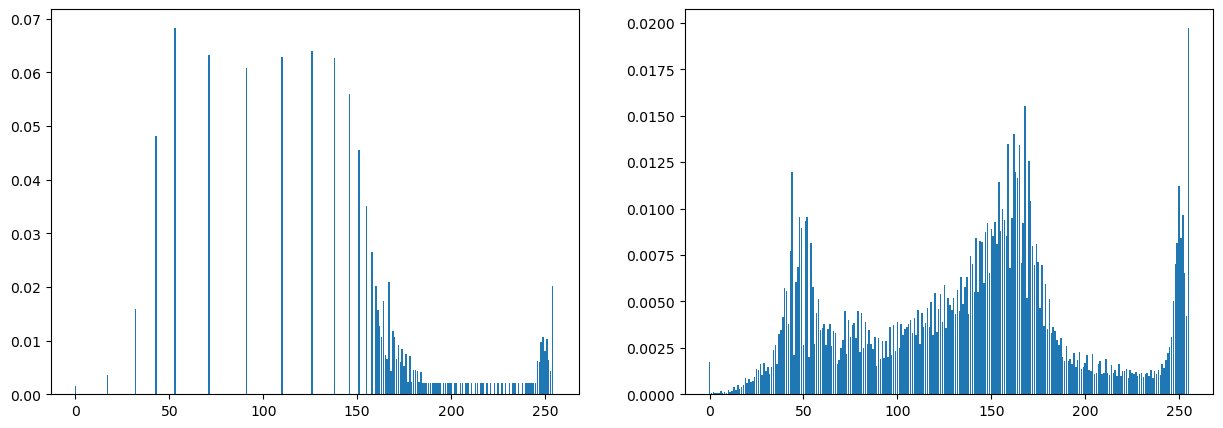

In [104]:
fig,ax = plt.subplots( ncols = 2, figsize = (15,5) )

ax[0].bar(range(0,256), Blue_freq_new);
ax[1].bar(range(0,256), Blue_high_freq);

-------
</br></br></br></br>

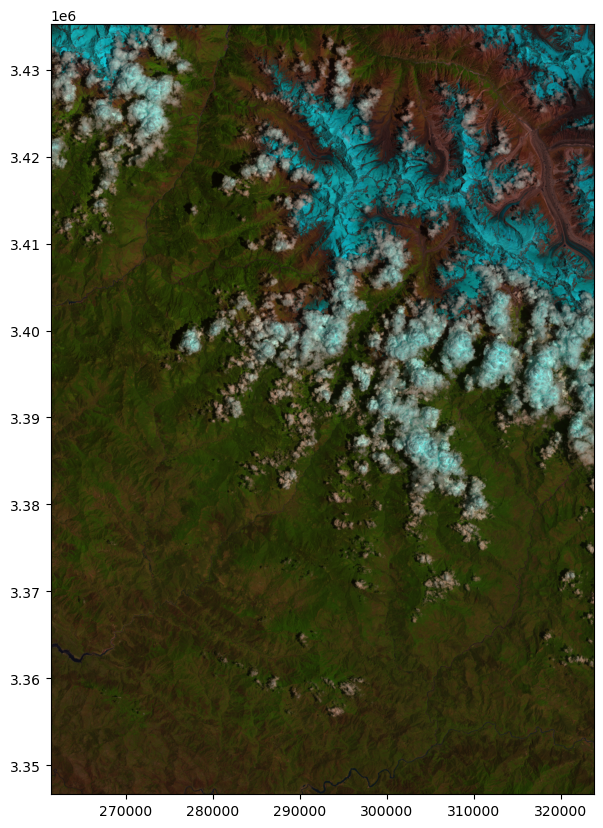

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
show((tci, [red, green, blue]), adjust='linear',ax=ax)
plt.show()

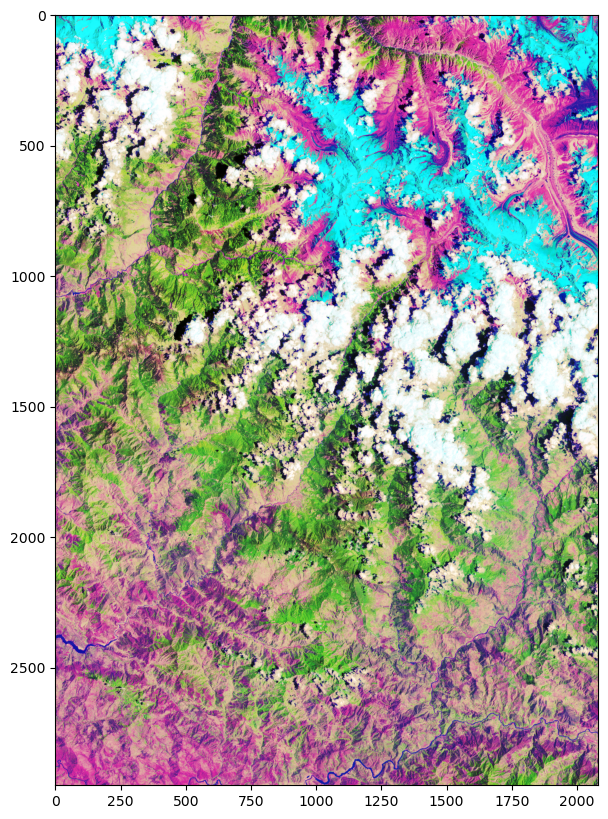

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))
show(t, adjust='linear', ax=ax)
plt.show()